In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,recall_score,precision_score

# Load data

In [5]:
path = 'yelp_data/health_text_sentiment.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

df = df[['stars','text',
 'clean_text']]

## select 1 & 5 stars

In [6]:
data = df.ix[np.where((df.stars==1)|(df.stars==5))]
# data.stars.replace(1,0,inplace=True)
# data.stars.replace(5,1,inplace=True)

data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...
5,1,I went to the emergency room because i was hav...,go emergency room kidney stone attack emergenc...
6,5,Dr. Byrne is an excellent doctor with all the ...,dr byrne excellent doctor right skill include ...


## split


In [89]:
# split
X = data['text'].values.astype(str)
Xc = data['clean_text'].values.astype(str)

y = data['stars'].values

## train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## CountVectorizer

In [9]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## TfidfVectorizer

In [10]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# LogisticRegression: CountVectorizer

In [11]:
lr_count_clf = LogisticRegression()
lr_count_clf.fit(count_train, y_train)
score = lr_count_clf.score(count_test, y_test)
print("accuracy:   %0.3f" % score)

accuracy:   0.971


In [ ]:
lr_count_clf = LogisticRegression()

lr_count_clf.fit(count_train, y_train)
pred = lr_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

## C value

In [17]:
c_results = dict()

c_values = np.arange(0.1,1,.1)
# c_values = np.around(c_values, decimals=2)
#c_values = [1,2,3,4,5,10,15,20]
c_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [18]:
for c in c_values:
    lr_count_clf = LogisticRegression(C=c)
    lr_count_clf.fit(count_train, y_train)
    score = lr_count_clf.score(count_test, y_test)
    print("C value: {:.2f} Score: {:.5f}".format(c, score))
    c_results[c] = score

C value: 0.10 Score: 0.97145
C value: 0.20 Score: 0.97230
C value: 0.30 Score: 0.97207
C value: 0.40 Score: 0.97168
C value: 0.50 Score: 0.97140
C value: 0.60 Score: 0.97129
C value: 0.70 Score: 0.97129
C value: 0.80 Score: 0.97106
C value: 0.90 Score: 0.97100


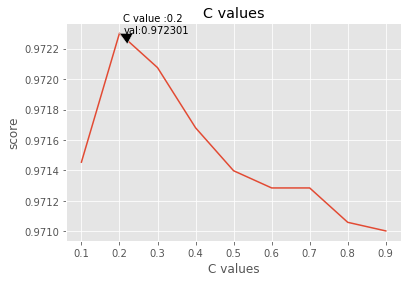

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(c_results.keys())
y=list(c_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'C value :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
            xytext=(xmax+.01,ymax)
            )
plt.title('C values')
plt.xlabel('C values')
plt.ylabel('score')
plt.show()

In [20]:
lr_count_clf = LogisticRegression(C=0.2)

lr_count_clf.fit(count_train, y_train)
pred = lr_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.972


In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97      7241
           5       0.98      0.98      0.98     10485

   micro avg       0.97      0.97      0.97     17726
   macro avg       0.97      0.97      0.97     17726
weighted avg       0.97      0.97      0.97     17726



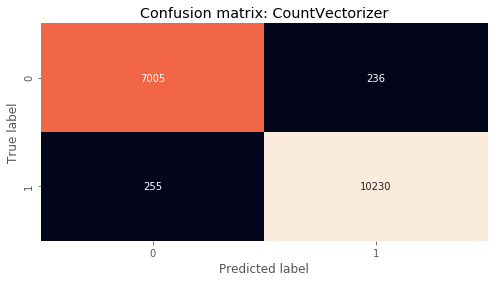

In [22]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('Confusion matrix: CountVectorizer')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# LogisticRegression: TfidfVectorizer

In [160]:
lr_tfidf_clf = LogisticRegression()
lr_tfidf_clf.fit(tfidf_train, y_train)
score = lr_tfidf_clf.score(tfidf_test, y_test)
print("accuracy:   %0.3f" % score)

accuracy:   0.958


In [47]:
c_results = dict()

c_values = np.arange(1,11,1)
# c_values = np.around(c_values, decimals=2)
#c_values = [1,2,3,4,5,10,15,20]
c_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [48]:
for c in c_values:    
    lr_tfidf_clf = LogisticRegression(C=c)
    lr_tfidf_clf.fit(tfidf_train, y_train)
    score = lr_tfidf_clf.score(tfidf_test, y_test)
    print("C value: {:.2f} Score: {:.5f}".format(c, score))
    c_results[c] = score

C value: 1.00 Score: 0.96987
C value: 2.00 Score: 0.97286
C value: 3.00 Score: 0.97354
C value: 4.00 Score: 0.97416
C value: 5.00 Score: 0.97484
C value: 6.00 Score: 0.97506
C value: 7.00 Score: 0.97506
C value: 8.00 Score: 0.97512
C value: 9.00 Score: 0.97478
C value: 10.00 Score: 0.97501


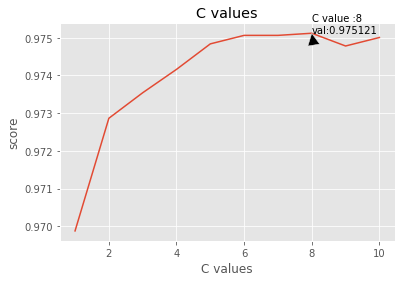

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(c_results.keys())
y=list(c_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'C value :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
            xytext=(xmax+.01,ymax)
            )
plt.title('C values')
plt.xlabel('C values')
plt.ylabel('score')
plt.show()

In [50]:
lr_tfidf_clf = LogisticRegression(C=8)
lr_tfidf_clf.fit(tfidf_train, y_train)
score = lr_tfidf_clf.score(tfidf_test, y_test)
print("accuracy:   %0.3f" % score)

accuracy:   0.975


## max_df values

In [59]:
dfrq_results = dict()

dfrq_range = np.arange(0.1,1.1,0.1)
dfrq_range = np.around(dfrq_range, decimals=2)
dfrq_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [60]:
for dfq in dfrq_range: 
    tfidf_vectorizer = TfidfVectorizer(max_df=dfq)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    lr_tfidf_clf = LogisticRegression(C=8)
    lr_tfidf_clf.fit(tfidf_train, y_train)
    score = lr_tfidf_clf.score(tfidf_test, y_test)
    print("max_df: {:.2f} Score: {:.5f}".format(dfq, score))
    dfrq_results[dfq] = score

max_df: 0.10 Score: 0.96491
max_df: 0.20 Score: 0.97174
max_df: 0.30 Score: 0.97298
max_df: 0.40 Score: 0.97315
max_df: 0.50 Score: 0.97411
max_df: 0.60 Score: 0.97399
max_df: 0.70 Score: 0.97461
max_df: 0.80 Score: 0.97416
max_df: 0.90 Score: 0.97478
max_df: 1.00 Score: 0.97512


In [61]:
dfrq_results

{0.1: 0.9649103012523976,
 0.2: 0.9717364323592463,
 0.3: 0.9729775471059461,
 0.4: 0.9731467900259506,
 0.5: 0.9741058332393094,
 0.6: 0.9739930046259732,
 0.7: 0.974613561999323,
 0.8: 0.9741622475459777,
 0.9: 0.9747828049193276,
 1.0: 0.9751212907593366}

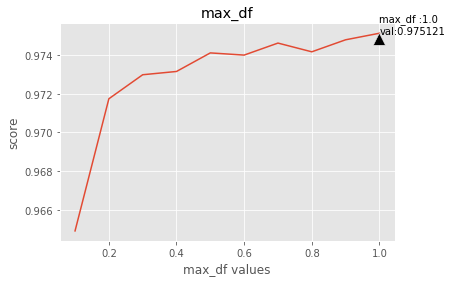

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(dfrq_results.keys())
y=list(dfrq_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'max_df :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
           # xytext=(xmax+.01,ymax)
            )
plt.title('max_df')
plt.xlabel('max_df values')
plt.ylabel('score')
plt.show()

##  ngrams

In [112]:
ngram_results = dict()
ngram_ranges = ((1,2),(1,3),(1,4),(2,3),(2,4))
ngram_ranges

((1, 2), (1, 3), (1, 4), (2, 3), (2, 4))

In [113]:

for ngram_range in ngram_ranges:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    lr_tfidf_clf = LogisticRegression()
    lr_tfidf_clf.fit(tfidf_train, y_train)
    score = lr_tfidf_clf.score(tfidf_test, y_test)
    print("ngram_range: {} Score: {:.5f}".format(ngram_range, score))
    ngram_results[ngram_range] = score

ngram_range: (1, 2) Score: 0.97004
ngram_range: (1, 3) Score: 0.96672
ngram_range: (1, 4) Score: 0.96254
ngram_range: (2, 3) Score: 0.96158
ngram_range: (2, 4) Score: 0.95763


In [164]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

lr_tfidf_clf = LogisticRegression()
lr_tfidf_clf.fit(tfidf_train, y_train)
score = lr_tfidf_clf.score(tfidf_test, y_test)
print("accuracy:   %0.3f" % score)

accuracy:   0.970


accuracy:   0.970


In [166]:
dfrq_results = dict()

dfrq_range = np.arange(0.1,1.1,0.1)
dfrq_range = np.around(dfrq_range, decimals=2)
dfrq_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [167]:
for dfq in dfrq_range: 
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=dfq)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    lr_tfidf_clf = LogisticRegression()
    lr_tfidf_clf.fit(tfidf_train, y_train)
    score = lr_tfidf_clf.score(tfidf_test, y_test)
    print("max_df: {:.2f} Score: {:.5f}".format(dfq, score))
    dfrq_results[dfq] = score

max_df: 0.10 Score: 0.97681
max_df: 0.20 Score: 0.97326
max_df: 0.30 Score: 0.97207
max_df: 0.40 Score: 0.97145
max_df: 0.50 Score: 0.97044
max_df: 0.60 Score: 0.96982
max_df: 0.70 Score: 0.96925
max_df: 0.80 Score: 0.96971
max_df: 0.90 Score: 0.96937
max_df: 1.00 Score: 0.97004


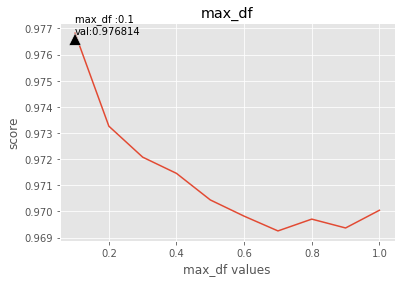

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(dfrq_results.keys())
y=list(dfrq_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'max_df :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
           # xytext=(xmax+.01,ymax)
            )
plt.title('max_df')
plt.xlabel('max_df values')
plt.ylabel('score')
plt.show()

In [170]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

lr_tfidf_clf = LogisticRegression()
lr_tfidf_clf.fit(tfidf_train, y_train)
score = lr_tfidf_clf.score(tfidf_test, y_test)
print("accuracy:   %0.3f" % score)

accuracy:   0.977


In [171]:
c_results = dict()

c_values = np.arange(1,11,1)
# c_values = np.around(c_values, decimals=2)
#c_values = [1,2,3,4,5,10,15,20]
c_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [172]:
for c in c_values:
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.1)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    lr_tfidf_clf = LogisticRegression(C=c)
    lr_tfidf_clf.fit(tfidf_train, y_train)
    score = lr_tfidf_clf.score(tfidf_test, y_test)
    print("C value: {:.2f} Score: {:.5f}".format(c, score))
    c_results[c] = score

C value: 1.00 Score: 0.97681
C value: 2.00 Score: 0.97947
C value: 3.00 Score: 0.98020
C value: 4.00 Score: 0.98059
C value: 5.00 Score: 0.98076
C value: 6.00 Score: 0.98088
C value: 7.00 Score: 0.98099
C value: 8.00 Score: 0.98121
C value: 9.00 Score: 0.98121
C value: 10.00 Score: 0.98138


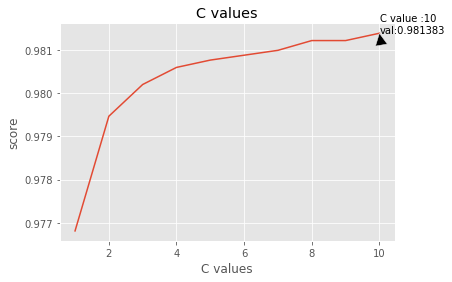

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111)

x=list(c_results.keys())
y=list(c_results.values())
line, = ax.plot(x, y)

ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
value = 'C value :{}\nval:{:3f}'.format(xmax,ymax)
ax.annotate(value, xy=(xmax, ymax),
            arrowprops=dict(facecolor='black'), 
            xytext=(xmax+.01,ymax)
            )
plt.title('C values')
plt.xlabel('C values')
plt.ylabel('score')
plt.show()

## Best Results

In [177]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

lr_tfidf_clf = LogisticRegression(C=10)
lr_tfidf_clf.fit(tfidf_train, y_train)
score = lr_tfidf_clf.score(tfidf_test, y_test)
print("accuracy:   %0.5f" % score)

accuracy:   0.98138
